In [2]:
from matplotlib import pyplot as plt
import  numpy as np
%matplotlib inline

# Example 2 Multiple minima vs initial guess and advanced fuctions
$g(x)=x^4-4x^2+5$

In [3]:
x_values = np.linspace(-2, 2, 1000)

def g(x):
    return (x**4) - 4*(x**2) + 5

def dg(x):
    return 4*(x**3) - 8*x 

## Gradient descent as a function

In [4]:
from typing import Union, Tuple
def gradient_desc(
    derivative_func, 
    initial_guess: Union[int, float], 
    learning_rate: Union[int, float], 
    precision: Union[int, float] = 0.0001,
    max_steps: int = 500
    ) -> Tuple[float, list, list]:
    """
    Gradient descent as a function
    @param derivative_func: A derivative function
    @param initial_guess: The initial guess
    @param learning_rate: The step multiplier/learning rate
    @param precision: The precision at which point to break the loop
    @param precision: The maximum allowed steps in the loop
    @return: The minimum for x the derivative, a list of x values in the derivative, and a list of slopes
    """
    new_x = initial_guess
    x_values = [new_x]
    slopes = [derivative_func(new_x)]

    for n in range(max_steps):
        prev_x = new_x
        gradient = derivative_func(prev_x)

        # Stepping down the slope
        new_x = prev_x - (learning_rate * gradient)
        
        # Add our slope and x values into their lists
        x_values.append(new_x)
        slopes.append(derivative_func(new_x))

        step_size = abs(new_x - prev_x)
        if step_size < precision:
            break

    return new_x, x_values, slopes

# Gradient Learning Rate

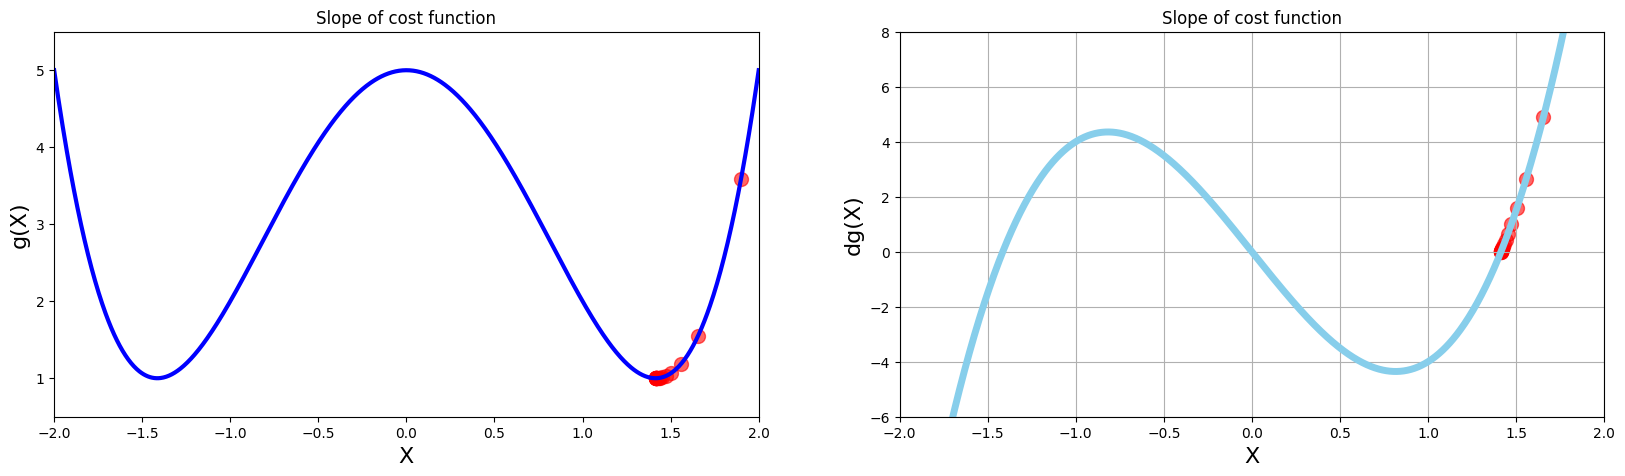

Local Minimum occurs at 1.4143779153550666
Number of steps 20


In [10]:
local_min, list_x, deriv_list = gradient_desc(derivative_func=dg, initial_guess=1.9, learning_rate=0.02, max_steps=500)
# superimpose gradient descent on Cost function plot and slope of the cost function
plt.figure(figsize=[20,5])


# First chart: Cost function
plt.subplot(1, 2, 1)
plt.title("Slope of cost function")
plt.xlim([-2,2])
plt.ylim([.5, 5.5])
plt.xlabel("X", fontsize=16)
plt.ylabel("g(X)", fontsize=16)
plt.plot(x_values, g(x_values), color="blue", linewidth=3)

plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)

# Second chart of the derivative
plt.subplot(1,2,2)
plt.title("Slope of cost function")
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(X)", fontsize=16)
plt.plot(x_values, dg(x_values), color="skyblue", linewidth=5)

plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)
plt.show()

print(f"Local Minimum occurs at {local_min}")
print(f"Number of steps {len(list_x)}")

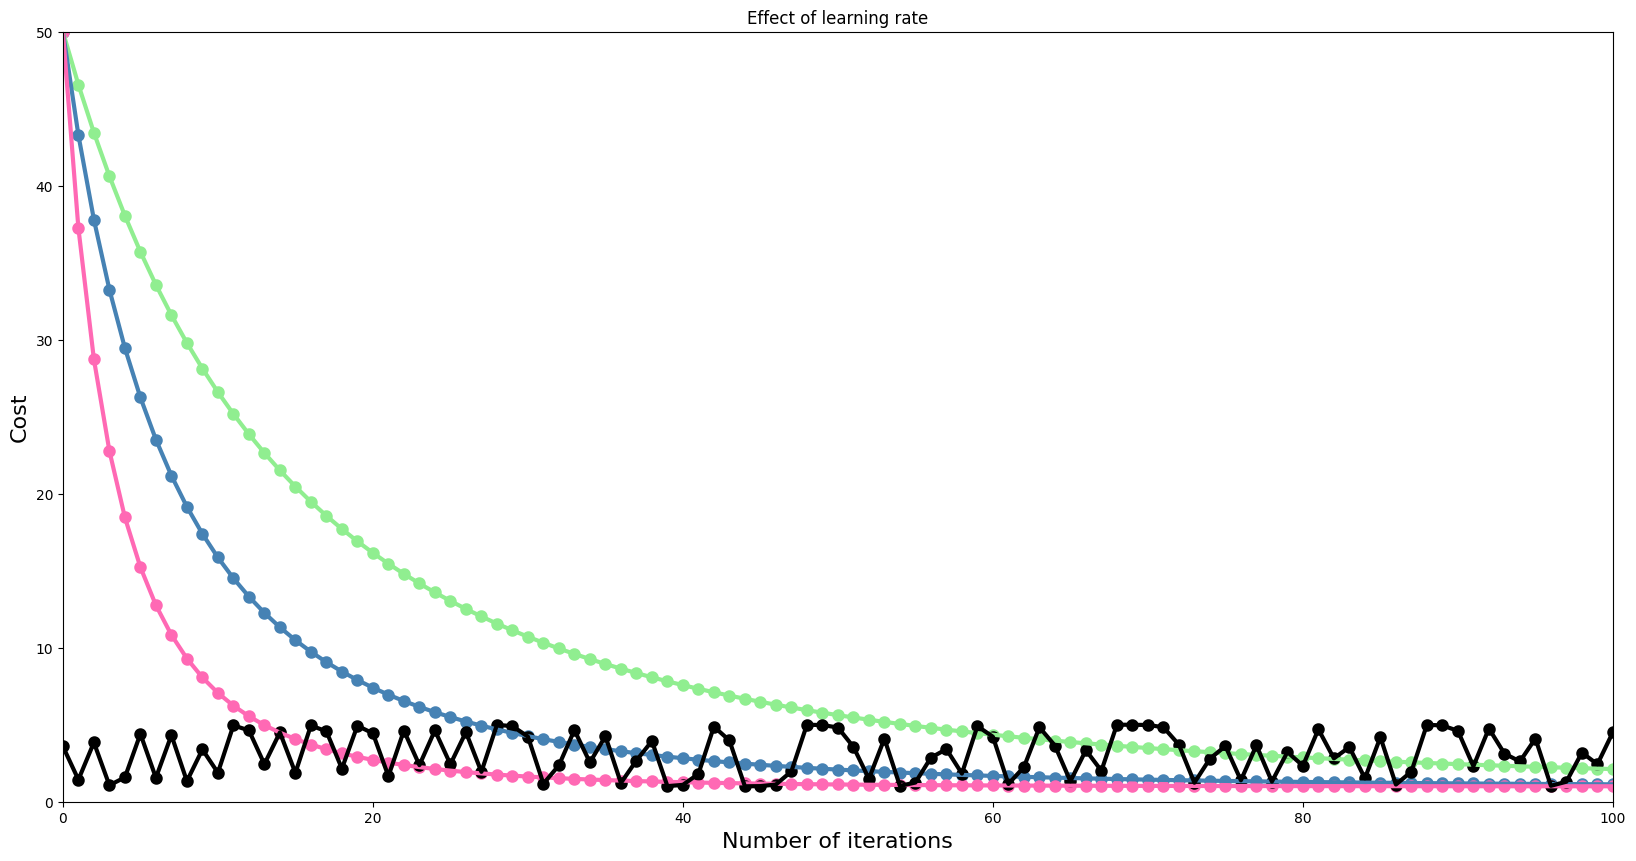

In [27]:
# Run gradient descent 3 times
n = 100
low_gama = gradient_desc(derivative_func=dg, initial_guess=3, learning_rate=0.0005, max_steps=n, precision=0.0001)
med_gama = gradient_desc(derivative_func=dg, initial_guess=3, learning_rate=0.001, max_steps=n, precision=0.0001)
high_gama = gradient_desc(derivative_func=dg, initial_guess=3, learning_rate=0.002, max_steps=n, precision=0.0001)
insane_gama = gradient_desc(derivative_func=dg, initial_guess=1.9, learning_rate=0.25, max_steps=n, precision=0.0001)
plt.figure(figsize=[20,10])


plt.title("Effect of learning rate")
plt.xlim(0, n)
plt.ylim(0, 50)
plt.xlabel("Number of iterations", fontsize=16)
plt.ylabel("Cost", fontsize=16)

# Y Axis
low_values = np.array(low_gama[1])
mid_values = np.array(med_gama[1])
high_values = np.array(high_gama[1])
insane_values = np.array(insane_gama[1])

iteration_list = list(range(0, n+1))
# Low
plt.plot(iteration_list, g(low_values), color="lightgreen", linewidth=3)
plt.scatter(iteration_list, g(low_values), color="lightgreen", linewidth=3)

# Med
plt.plot(iteration_list, g(mid_values), color="steelblue", linewidth=3)
plt.scatter(iteration_list, g(mid_values), color="steelblue", linewidth=3)

# High
plt.plot(iteration_list, g(high_values), color="hotpink", linewidth=3)
plt.scatter(iteration_list, g(high_values), color="hotpink", linewidth=3)

# Insane
plt.plot(iteration_list, g(insane_values), color="black", linewidth=3)
plt.scatter(iteration_list, g(insane_values), color="black", linewidth=3)

plt.show()